In [1]:
import numpy as np
import math
import pickle
import operator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib2
import time
from scipy.misc import imread
from scipy.misc import imresize
from gensim import corpora, models




In [2]:
# load the list of images
img_list = np.load('data/img_list_animals.npy')


# Topic Model with 5 Topics
###### The plots below show the images per topic arranged in left to right, top to bottom manner in decreasing order of their scores for the corresponding topic.

In [3]:
num_topics = 5
# Load results
with open("results/5-topic-res.txt", "rb") as fp:
    img_by_topic = pickle.load(fp)


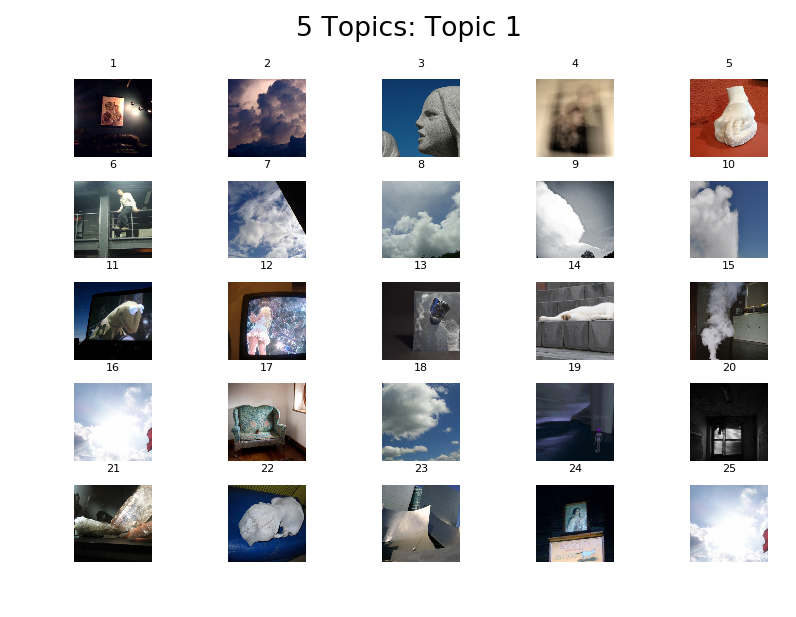

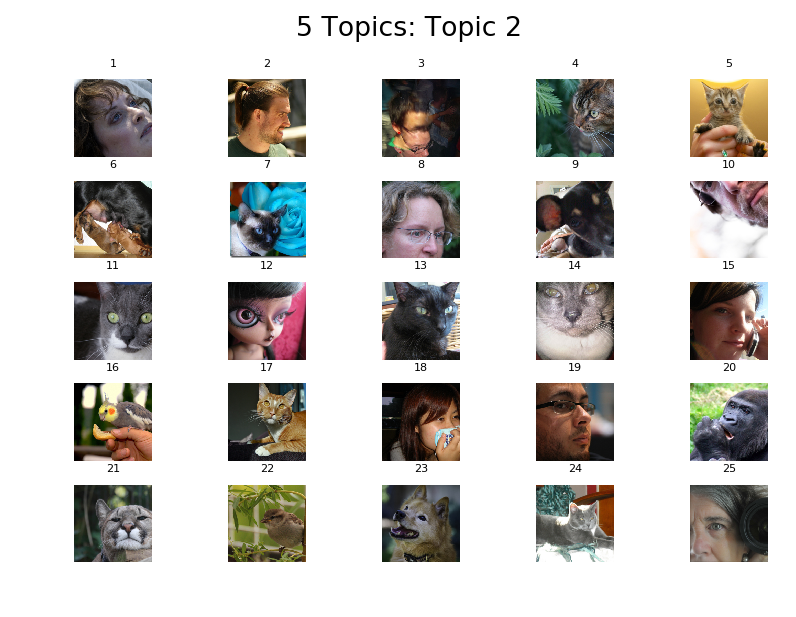

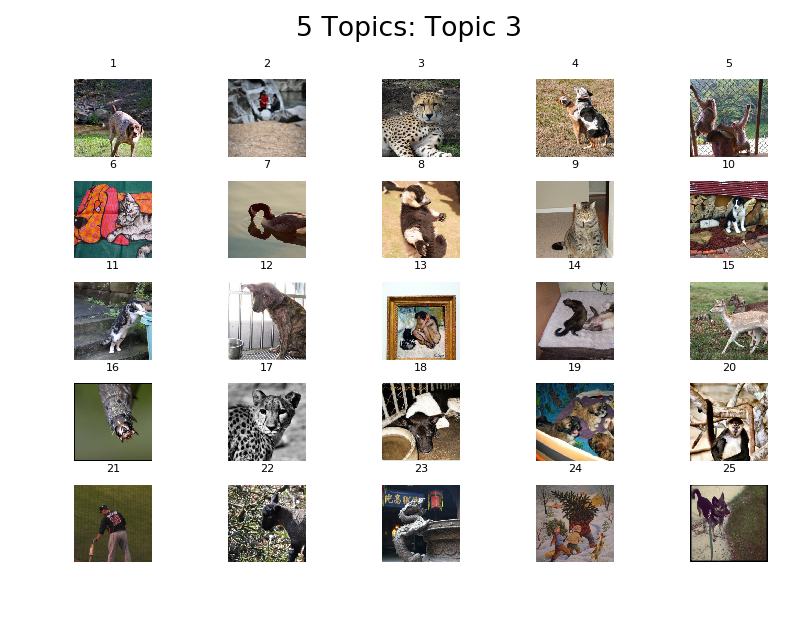

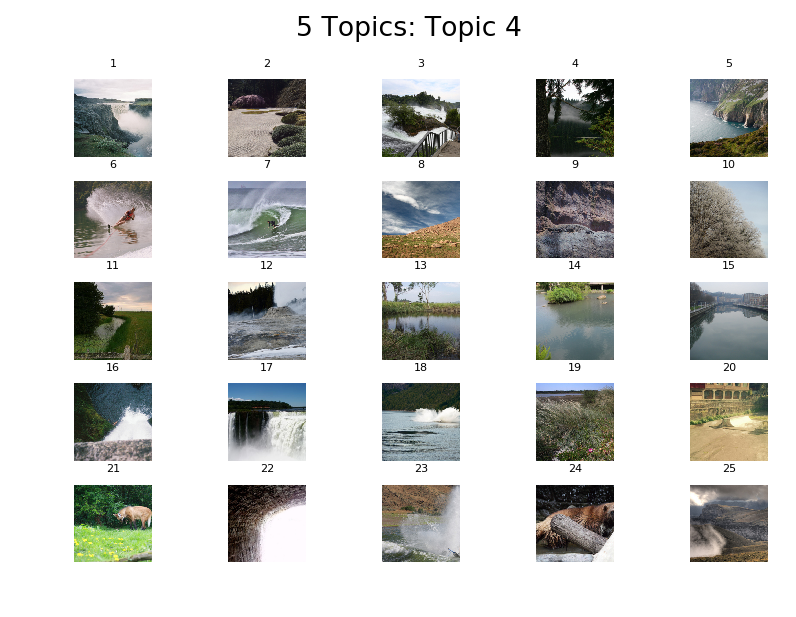

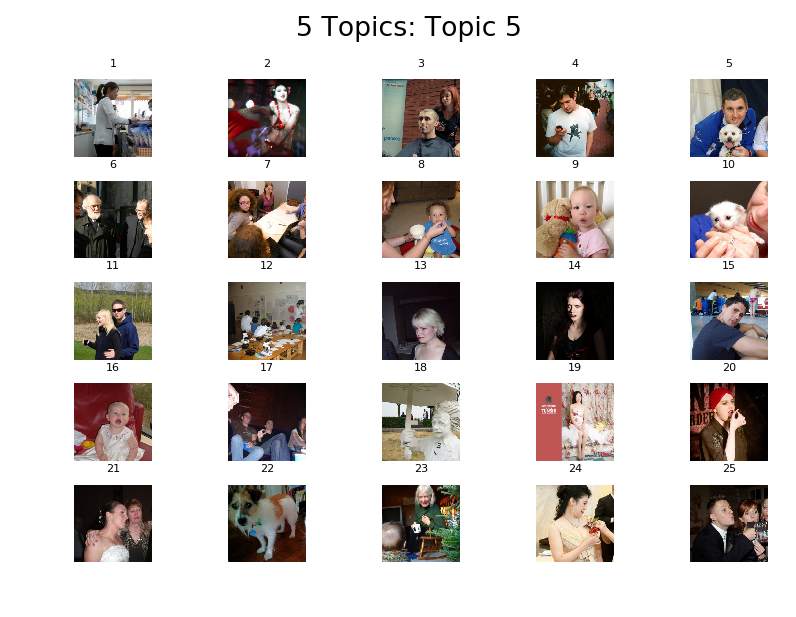

In [4]:
topic_list = range(num_topics)
num_topics = len(topic_list)
for topic in topic_list:
    fig, ax = plt.subplots(nrows=5, ncols=5, dpi=160)
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    fig.suptitle(str(num_topics)+' Topics: Topic '+str(topic+1))
    i = 0
    for row in ax:
        for col in row:
            image_url = 'https://multimedia-commons.s3-us-west-2.amazonaws.com/data/images'+img_list[img_by_topic[topic][i][0]].split('data')[2]
            # create a file-like object from the url
            f = urllib2.urlopen(image_url)
            # read the image from url
            I = plt.imread(f,  format='jpg')
            min_dim = min(I.shape[0],I.shape[1])
            r = 227.0/min_dim
            new_width = I.shape[0]*r
            new_height = I.shape[1]*r
            I = imresize(I,(int(math.ceil(new_width)),int(math.ceil(new_height)),3))
            I = I[0:227,0:227,:3]
            i += 1
            col.axis('off')
            col.set_title(i, fontsize=5)
            col.imshow(I)
    plt.show()     
